In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df=pd.read_csv('NetflixOriginals.csv',encoding="ISO-8859-1")
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [3]:
df["Premiere"] = df["Premiere"]
df.describe() #aykırı değerler yok

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [4]:
df.isnull().sum()#Veri setinde  NaN yok

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

### Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

In [5]:
df1=df[['Title','Runtime','Language']].sort_values(by='Runtime',ascending=False).head(10)#10 en uzun filmleri gösteriyor
df1

,Title,Runtime,Language
561,The Irishman,209,English
328,Da 5 Bloods,155,English
581,Springsteen on Broadway,153,English
247,Citation,151,English
284,The Forest of Love,151,Japanese
509,Raat Akeli Hai,149,Hindi
7,The Last Days of American Crime,149,English
543,Ludo,149,Hindi
194,Army of the Dead,148,English
5,Drive,147,Hindi


<AxesSubplot:title={'center':'Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur?(ilk 10 film)'}, xlabel='Language'>

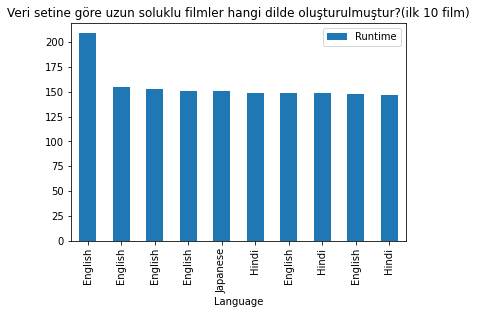

In [6]:
df1.plot.bar(x='Language',y='Runtime',title='Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur?(ilk 10 film)')

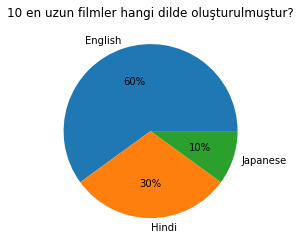

In [7]:
df1_1=df1.groupby('Language').count().reset_index()
plt.pie(df1_1['Runtime'], labels=df1_1['Language'] ,  autopct='%.0f%%')
plt.title('10 en uzun filmler hangi dilde oluşturulmuştur?')
plt.show()

In [8]:
df1_2 = df[(df["Runtime"] > (df["Runtime"].mean()))].groupby("Language").agg({"Runtime": "count"}).sort_values(by = "Runtime", ascending= False)
#ortalamadan uzun filmleri gösteriyor ve dillere göre gruplanmış
df1_2.reset_index(inplace=True)
df1_2

,Language,Runtime
0,English,232
1,Hindi,32
2,Spanish,18
3,French,12
4,Italian,10
5,Portuguese,9
6,Indonesian,7
7,Korean,5
8,Japanese,4
9,Turkish,4


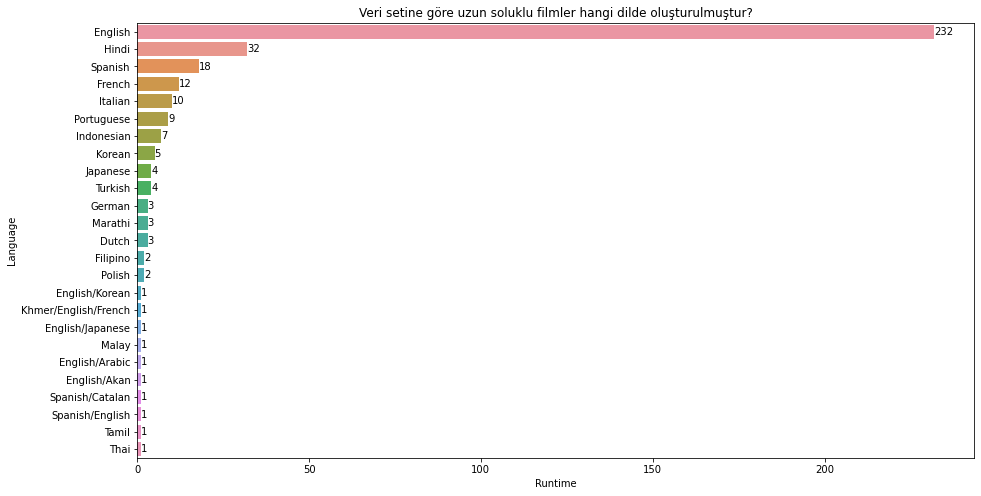

In [9]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=df1_2,x="Runtime", y="Language",) 
plt.bar_label(ax.containers[0])
plt.title('Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur?')
plt.show()

### 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [10]:
df["Premiere"] = df["Premiere"].apply(pd.to_datetime)
df2=df[(df["Premiere"] >= "2019, 01, 01" ) & (df["Premiere"] <= "2020, 06, 30")  & (df["Genre"] == "Documentary")]
df2=df2[['Title','Genre','Premiere','IMDB Score']]
df2

,Title,Genre,Premiere,IMDB Score
0,Enter the Anime,Documentary,2019-08-05,2.5
15,After the Raid,Documentary,2019-12-19,4.3
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,4.4
30,After Maria,Documentary,2019-05-24,4.6
111,Ghosts of Sugar Land,Documentary,2019-10-16,5.5
151,One Take,Documentary,2020-06-18,5.7
263,A Tale of Two Kitchens,Documentary,2019-05-22,6.3
286,The Legend of Cocaine Island,Documentary,2019-03-29,6.3
290,Travis Scott: Look Mom I Can Fly,Documentary,2019-08-28,6.3
295,Birders,Documentary,2019-09-25,6.4


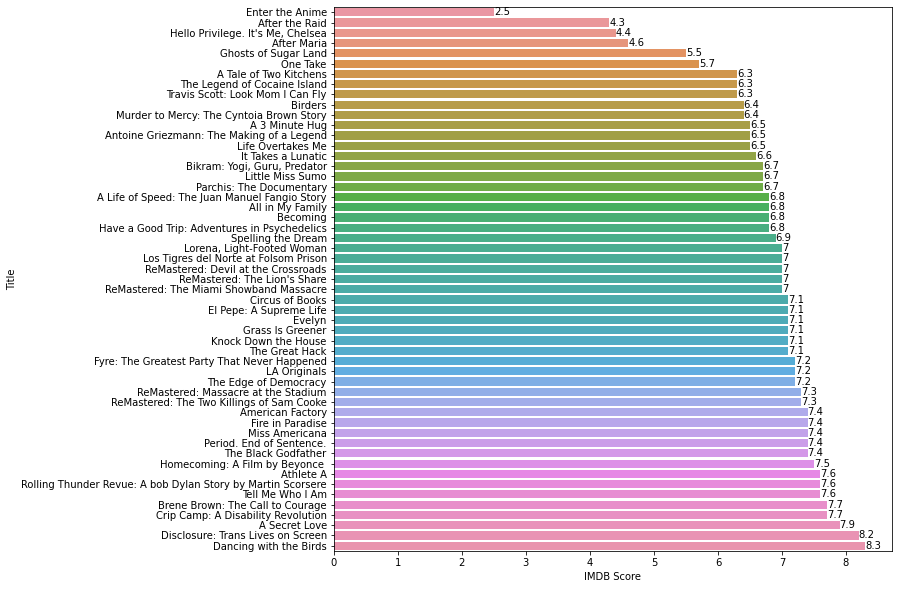

In [11]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=df2,y="Title", x="IMDB Score",) 
plt.bar_label(ax.containers[0])
plt.show()

### İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [12]:
df[['Genre','Language','IMDB Score']][df['Language']=='English'].sort_values(by=['IMDB Score'],ascending=False).head(1)

,Genre,Language,IMDB Score
583,Documentary,English,9.0


In [13]:
print('İngilizce çekilen filmler içerisinde',df['Genre'][(df['Language']=='English') & (df['IMDB Score']==df['IMDB Score'].max())].iloc[0],'türü en yüksek IMDB puanına sahiptir.')

İngilizce çekilen filmler içerisinde Documentary türü en yüksek IMDB puanına sahiptir.


### 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [14]:
df4=df[df['Language']=='Hindi']
print("'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi {:.2f}".format(df4['Runtime'].mean()))

'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi 115.79


### 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [15]:
print("'Genre' Sütunu {} kategoriye sahiptir.".format(df["Genre"].nunique()))

'Genre' Sütunu 115 kategoriye sahiptir.


In [16]:
df5 = df.groupby("Genre").agg({"Title": "count"}).sort_values(by = "Title", ascending= False)
df5.reset_index(inplace=True)
print('Kategoriler:', df5['Genre'].values)

Kategoriler: ['Documentary' 'Drama' 'Comedy' 'Romantic comedy' 'Thriller'
 'Comedy-drama' 'Crime drama' 'Biopic' 'Horror' 'Action'
 'Aftershow / Interview' 'Concert Film' 'Romance' 'Action comedy'
 'Romantic drama' 'Animation' 'Science fiction/Thriller'
 'Psychological thriller' 'Animation / Short' 'Variety show'
 'Science fiction' 'Horror thriller' 'Sports-drama' 'One-man show'
 'Science fiction/Drama' 'Action-thriller' 'Western' 'Family film'
 'Family' 'Mystery' 'Horror-thriller' 'Musical comedy' 'Dark comedy'
 'Mockumentary' 'Satire' 'Making-of' 'Musical' 'Spy thriller'
 'Comedy / Musical' 'War drama' 'War' 'Adventure' 'Black comedy'
 'Superhero' 'Anime/Science fiction' 'Musical / Short'
 'Psychological horror' 'Political thriller' 'Teen comedy horror'
 'Variety Show' 'Teen comedy-drama' 'Urban fantasy' 'Superhero/Action'
 'Musical/Western/Fantasy' 'War-Comedy' 'Supernatural drama'
 'Romance drama' 'Psychological thriller drama' 'Superhero-Comedy'
 'Science fiction thriller' 'Stop M

In [17]:
df5.rename(columns = {'Title' : 'Count'}, inplace = True)
df5 #Her kategoride kaç film var gösteriyor

,Genre,Count
0,Documentary,159
1,Drama,77
2,Comedy,49
3,Romantic comedy,39
4,Thriller,33
5,Comedy-drama,14
6,Crime drama,11
7,Biopic,9
8,Horror,9
9,Action,7


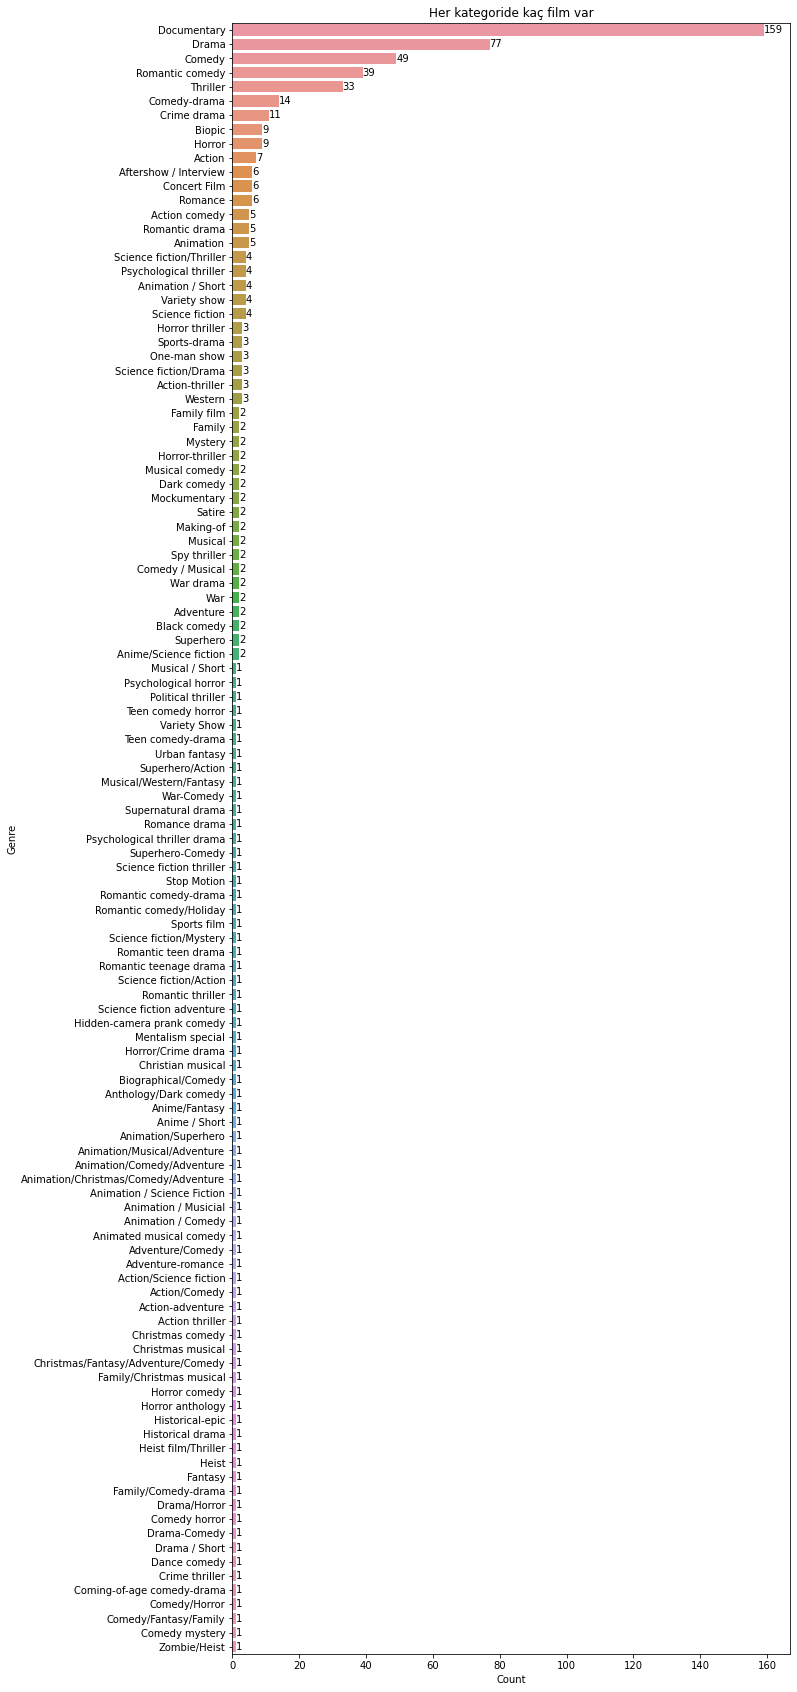

In [18]:
plt.figure(figsize=(10,30))
ax = sns.barplot(data=df5,y="Genre", x="Count",) 
plt.bar_label(ax.containers[0])
plt.title("Her kategoride kaç film var")
plt.show()

### Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [19]:
df6=df[['Language','Title']].groupby(by='Language').count().sort_values(by='Title',ascending=False).head(3)
df6.rename(columns = {'Title' : 'Count'}, inplace = True)
df6

,Count
Language,
English,401
Hindi,33
Spanish,31


### IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [20]:
df[['Title','IMDB Score']].sort_values(by='IMDB Score',ascending=False).head(10)

,Title,IMDB Score
583,David Attenborough: A Life on Our Planet,9.0
582,Emicida: AmarElo - It's All For Yesterday,8.6
581,Springsteen on Broadway,8.5
580,Winter on Fire: Ukraine's Fight for Freedom,8.4
579,Taylor Swift: Reputation Stadium Tour,8.4
578,Ben Platt: Live from Radio City Music Hall,8.4
577,Dancing with the Birds,8.3
576,Cuba and the Cameraman,8.3
573,Klaus,8.2
571,13th,8.2


### IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

In [21]:
import numpy as np
cor = np.corrcoef(df['Runtime'], df['IMDB Score'])
cor #korelasyon neredeyse yok

array([[ 1.        , -0.04089629],
       [-0.04089629,  1.        ]])

<AxesSubplot:title={'center':'Korelasyon'}>

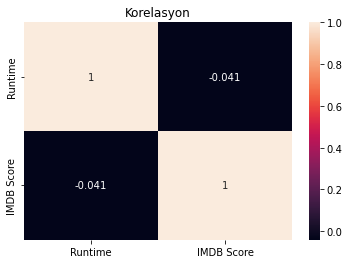

In [22]:
plt.title('Korelasyon')
sns.heatmap(df.corr(), annot=True)

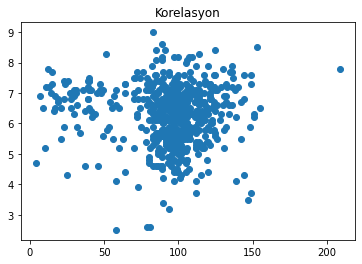

In [23]:
plt.scatter(df['Runtime'], df['IMDB Score'])
plt.title('Korelasyon')
plt.show()

### IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [25]:
    df7= df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False).head(10)
df7.reset_index(inplace=True)
df7

,Genre,IMDB Score
0,Documentary,9.0
1,One-man show,8.5
2,Concert Film,8.4
3,Animation/Christmas/Comedy/Adventure,8.2
4,Drama,7.9
5,Animation / Short,7.8
6,Crime drama,7.8
7,Musical / Short,7.7
8,Making-of,7.7
9,War drama,7.7


<AxesSubplot:title={'center':"IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir"}, ylabel='Genre'>

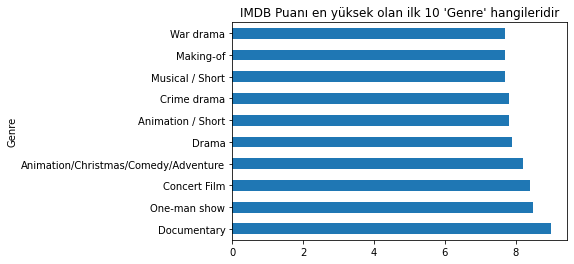

In [26]:
df7.plot.barh(x='Genre',title="IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir",legend=None)

### 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [27]:
df8=df.sort_values(by='Runtime',ascending=False).head(10)

<AxesSubplot:title={'center':"'Runtime' değeri en yüksek olan ilk 10 film hangileridir?"}, ylabel='Title'>

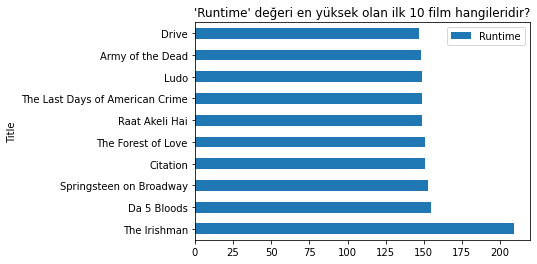

In [28]:
df8.plot.barh(x='Title',y='Runtime',title="'Runtime' değeri en yüksek olan ilk 10 film hangileridir?")

### Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [29]:
df['Year'] = df['Premiere'].dt.year
df9=df[['Year','Title']].groupby(['Year']).count().sort_values('Title',ascending=False).head(1)
df9

,Title
Year,
2020,183


<AxesSubplot:xlabel='Years', ylabel='Count'>

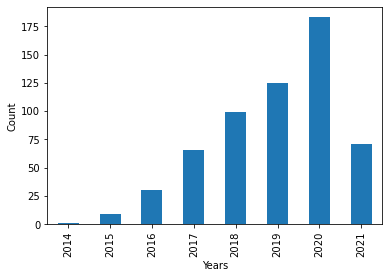

In [30]:
df[['Year','Title']].groupby(['Year']).count().plot.bar(xlabel='Years',ylabel='Count',legend=None)

In [31]:
print(df['Year'][df['Title']==df['Title'].max()].iloc[0],'yılda en fazla film yayımlanmıştır')

2020 yılda en fazla film yayımlanmıştır


### Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [32]:
df10 = df[['IMDB Score','Language']].groupby('Language').mean().sort_values(by='IMDB Score')
df10.reset_index(inplace=True)
df10[df10['IMDB Score']==df10['IMDB Score'].min()]

,Language,IMDB Score
0,Malay,4.2


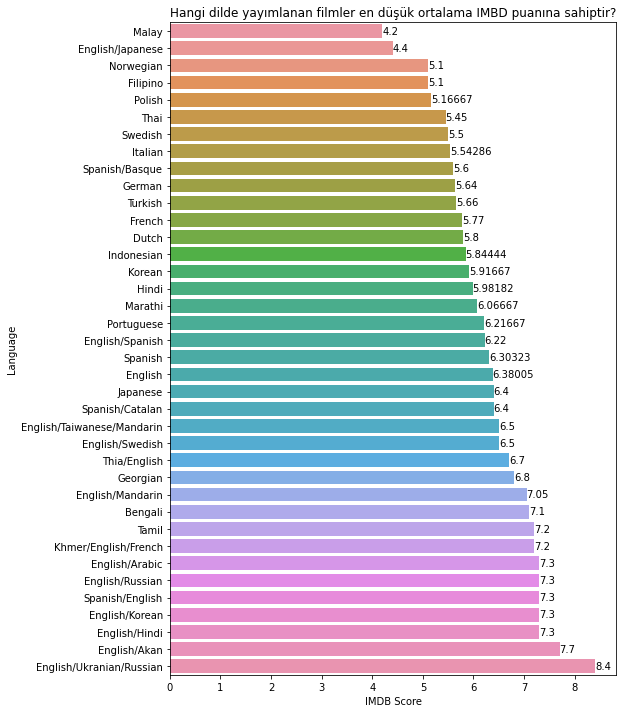

In [33]:
plt.figure(figsize=(8,12))
ax = sns.barplot(data=df10,y="Language", x="IMDB Score",) 
plt.bar_label(ax.containers[0])
plt.title('Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir?')
plt.show()

In [34]:
print(df10['Language'][df10['IMDB Score']==df10['IMDB Score'].min()][0],'dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir.')

Malay dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir.


### Hangi yılın toplam "runtime" süresi en fazladır?

In [35]:
df11=df[['Runtime','Year']].groupby(['Year']).sum().sort_values('Runtime',ascending=False).head(1)
df11.reset_index(inplace=True)
df11

,Year,Runtime
0,2020,17384


In [36]:
print(df11.iloc[0][0],'yılın toplam "runtime" süresi en fazladır.')

2020 yılın toplam "runtime" süresi en fazladır.


### Her bir dilin en fazla kullanıldığı "Genre" nedir

In [37]:
df12=df.groupby(["Language"])["Genre"].value_counts()
df12.groupby('Language',group_keys=False).head(1)

Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar